<a href="https://colab.research.google.com/github/pragya798/Visualizing-PUBG-final-prediction/blob/main/PUBG_Visualizing_Placement_Prediction%F0%9F%93%88%F0%9F%93%8A%F0%9F%93%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><strong><span style="color:blue">PUBG:Finish Placement Prediction</span></strong></center></h1>

<h3>Dataset Description:</h3>
In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.

You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 player per group.

You must create a model which predicts players' finishing placement based on their final stats, on a scale from 1 (first place) to 0 (last place).

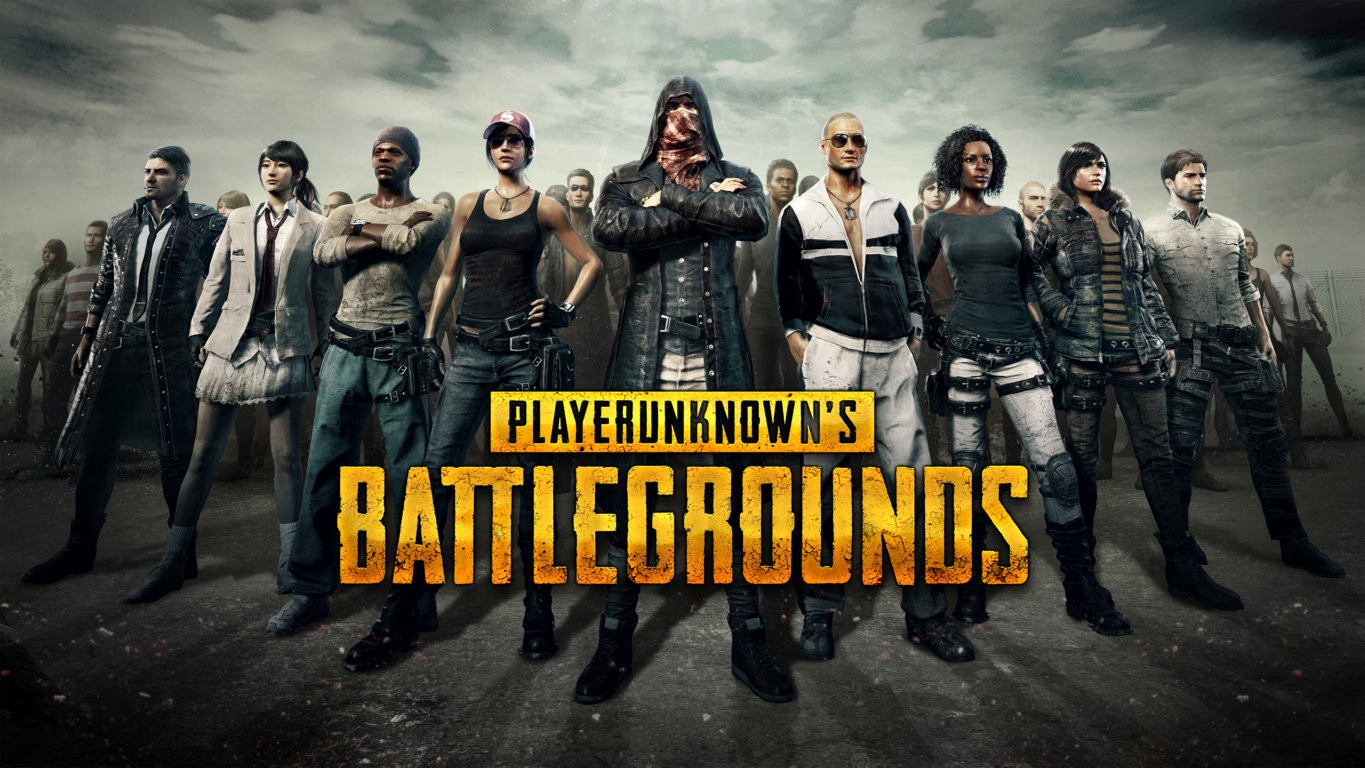


<h3>Following questions was answered: </h3>
<ol>
<li>Does killing people increase the chance of winning the game?</li>
<li>Distance travelled impacted in winning the game?</li>
<li>How to catch fraud in the game?</li>
<li>Which character was more important while making prediction?</li>
</ol>


<h3>Importing Libraries</h3>

In [23]:
import pandas as pd

Importing Dataset

In [24]:
train="/content/drive/MyDrive/data/train_V2.csv"
test="/content/drive/MyDrive/data/test_V2.csv"

In [25]:
df=pd.read_csv(train)

In [26]:
df1=pd.read_csv(test)

In [27]:
#Shape of train dataset
df.shape

(4446966, 29)

In [28]:
#Shape of test dataset
df1.shape

(1934174, 28)

In [29]:
#Info on the train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [30]:
#Top 5 rows on the dataset:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


###Dataset has following attributes:
<ul>
<li>DBNOs - Number of enemy players knocked.</li>
<li>assists - Number of enemy players this player damaged that were killed by teammates.</li>
<li>boosts - Number of boost items used.</li>
<li>damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.</li>
<li>headshotKills - Number of enemy players killed with headshots.</li>
<li>heals - Number of healing items used.</li>
<li>Id - Player’s Id</li>
<li>killPlace - Ranking in match of number of enemy players killed.</li>
<li>killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.</li>
<li>killStreaks - Max number of enemy players killed in a short amount of time.</li>
<li>kills - Number of enemy players killed.</li>
<li>longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.</li>
<li>matchDuration - Duration of match in seconds.</li>
<li>matchId - ID to identify match. There are no matches that are in both the training and testing set.</li>
<li>matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.</li>
<li>rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.</li>
<li>revives - Number of times this player revived teammates.</li>
<li>rideDistance - Total distance traveled in vehicles measured in meters.</li>
<li>roadKills - Number of kills while in a vehicle.</li>
<li>swimDistance - Total distance traveled by swimming measured in meters.</li>
<li>teamKills - Number of times this player killed a teammate.</li>
<li>vehicleDestroys - Number of vehicles destroyed.</li>
<li>walkDistance - Total distance traveled on foot measured in meters.</li>
<li>weaponsAcquired - Number of weapons picked up.</li>
<li>winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.</li>
<li>groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.</li>
<li>numGroups - Number of groups we have data for in the match.</li>
<li>maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.</li>
<li>winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.</li>
</ul>

###The Killers

In [31]:
print("The average person kills {:.4f} players, 99% of people have {} killed, kills that are recovered {} ".format(df['kills'].mean(),df['kills'].quantile(0.99),
           df['kills'].max()))

The average person kills 0.9248 players, 99% of people have 7.0 killed, kills that are recovered 72 


<h3>Plot The Killers</h3>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


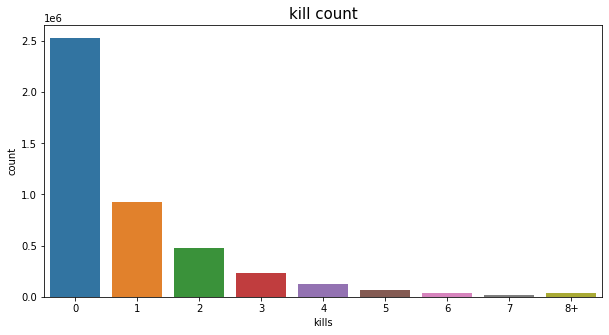

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
data=df.copy()
data.loc[data['kills']>data['kills'].quantile(0.99)]='8+'
plt.figure(figsize=(10,5))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("kill count",fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


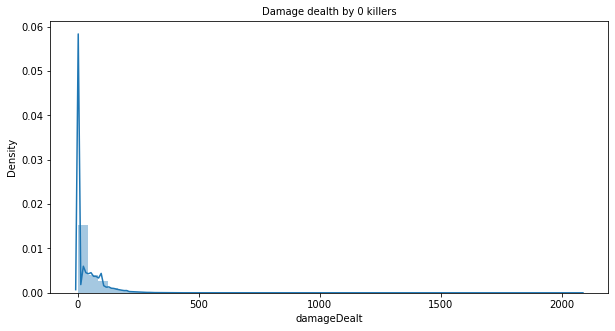

In [33]:
data=df.copy()
data=data[data['kills']==0]
plt.figure(figsize=(10,5))
plt.title("Damage dealth by 0 killers",fontsize=10)
sns.distplot(data['damageDealt'])
plt.show()

<h3>Investigating the exceptional cases.</h3>

In [34]:
print("{} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]),
                                                                    100*len(data[data['winPlacePerc']==1])/len(train)))
data1=df[df['damageDealt']==0].copy()
print("{} players ({:.4f}%) have won without dealing damage!".format(len(data1[data1['winPlacePerc']==1]), 
                                                                     100*len(data1[data1['winPlacePerc']==1])/len(train)))

16666 players (41665.0000%) have won without a single kill!
4770 players (11925.0000%) have won without dealing damage!


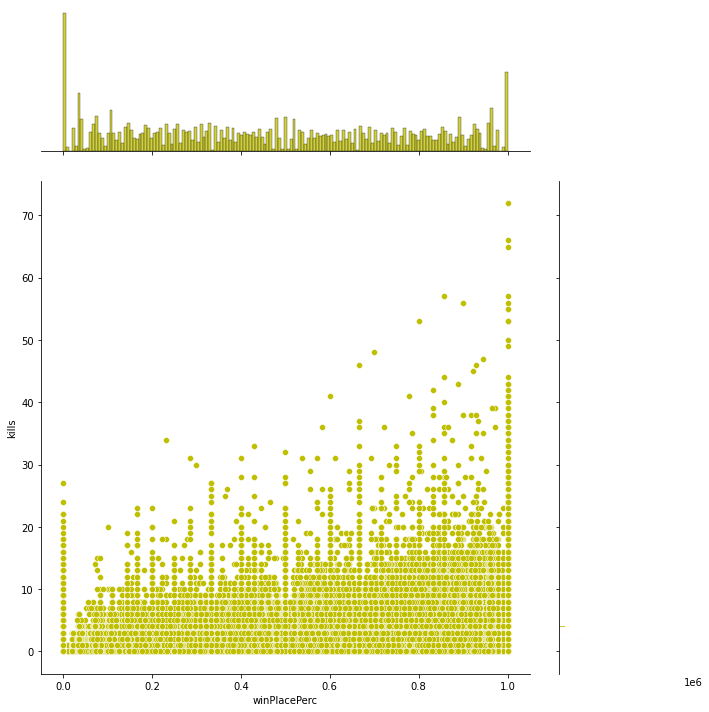

In [35]:
#Plot win placement percentage vs kills
sns.jointplot(x="winPlacePerc",y="kills",data=df,height=10,ratio=3,color='y')
plt.show()

###Plotting correlation between killing and winning PUBG

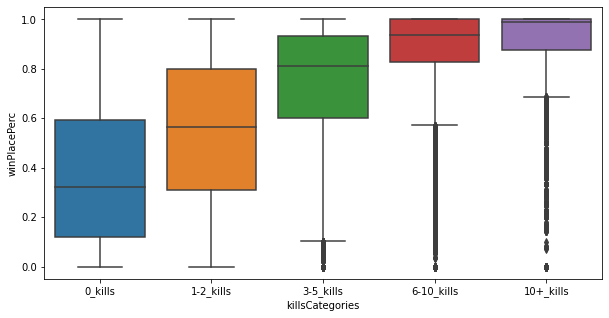

In [36]:
kills=df.copy()
kills['killsCategories']= pd.cut(kills['kills'],[-1,0,2,5,10,60],labels=['0_kills','1-2_kills','3-5_kills','6-10_kills','10+_kills'])
plt.figure(figsize=(10,5))
sns.boxplot(x='killsCategories',y="winPlacePerc",data=kills)
plt.show()

###The Runners
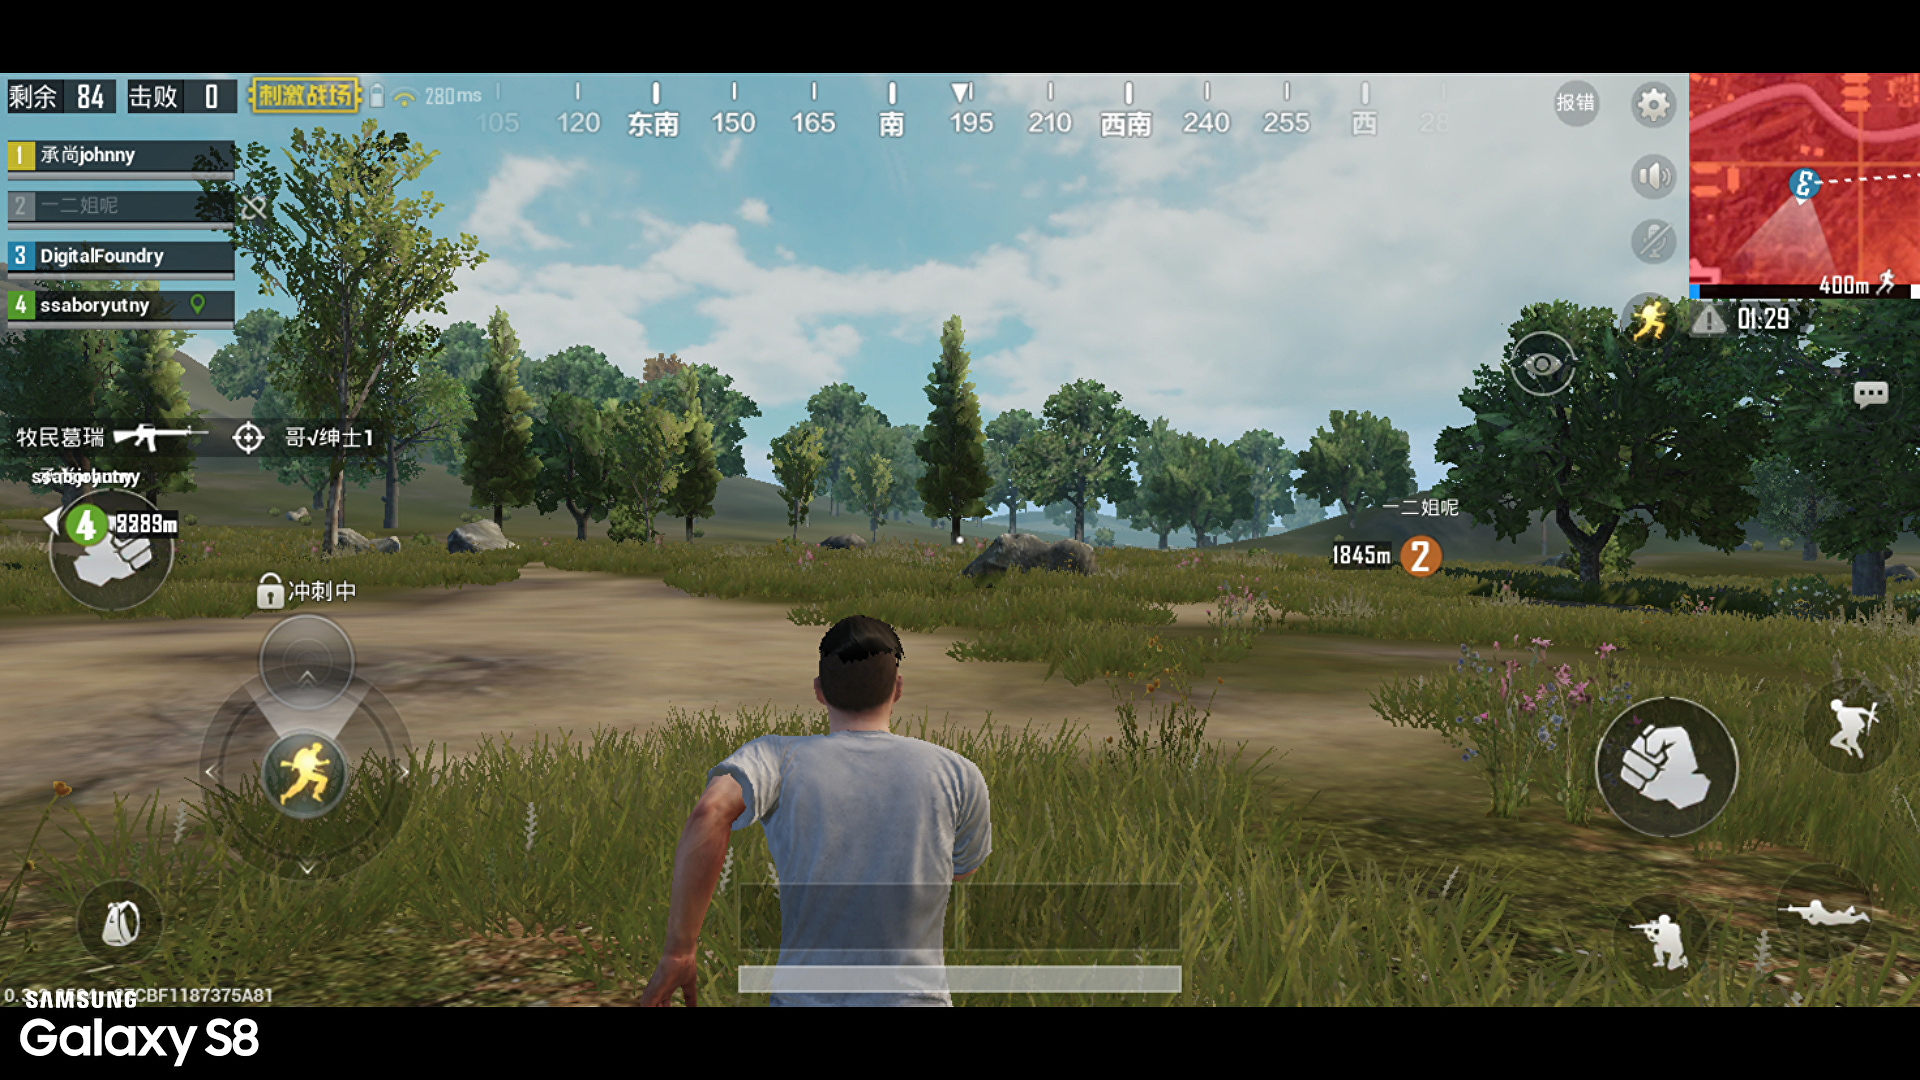

In [37]:
print("average person walks for {:.1f}m, 99% people have walk {}m or less, while the marathorian champion walk for {}m. "
.format(df['walkDistance'].mean(),df['walkDistance'].quantile(0.99),df['walkDistance'].max()))

average person walks for 1154.2m, 99% people have walk 4396.0m or less, while the marathorian champion walk for 25780.0m. 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


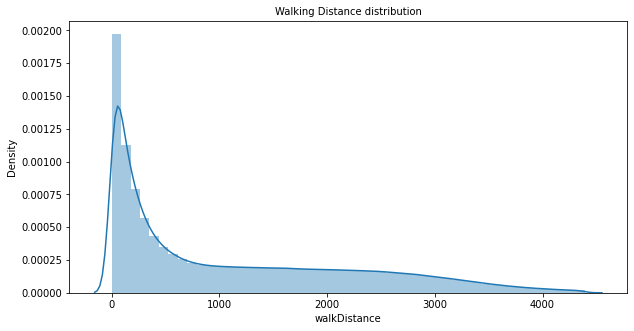

In [38]:
data=df.copy()
data=data[data['walkDistance']<data['walkDistance'].quantile(0.99)]
plt.figure(figsize=(10,5))
plt.title("Walking Distance distribution",fontsize=10)
sns.distplot(data["walkDistance"])
plt.show()

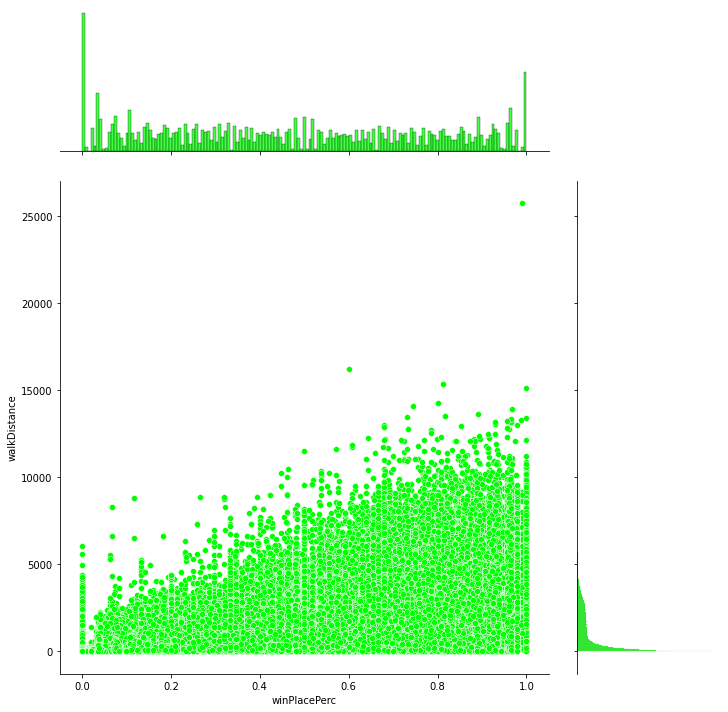

In [39]:
sns.jointplot(x="winPlacePerc",y="walkDistance",data=df,height=10,ratio=3,color='lime')
plt.show()

In [40]:
print("average person walks for {:.1f}m, 99% people have walk {}m or less, while the formula 1 champion drived for {}m. "
.format(df['rideDistance'].mean(),df['rideDistance'].quantile(0.99),df['rideDistance'].max()))

average person walks for 606.1m, 99% people have walk 6966.0m or less, while the formula 1 champion drived for 40710.0m. 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


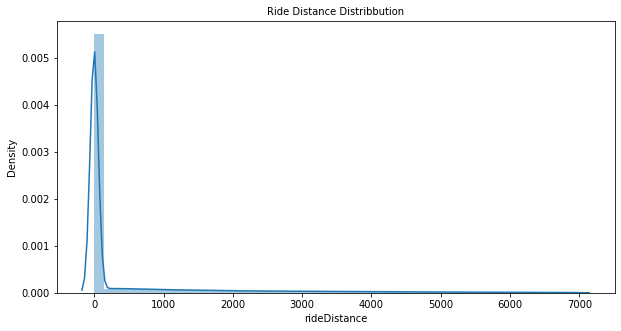

In [41]:
data=df.copy()
data=data[data['rideDistance']<data['rideDistance'].quantile(0.99)]
plt.figure(figsize=(10,5))
plt.title("Ride Distance Distribbution",fontsize=10)
sns.distplot(data['rideDistance'])
plt.show()

In [42]:
print("{} players ({:.4f}%)m, drived for 0 meters. This means that they don't have a driving license yet."
.format(len(data[data['rideDistance']==0]),100*len(data1[data1['rideDistance']==0])/len(train)))

3309429 players (2568367.5000%)m, drived for 0 meters. This means that they don't have a driving license yet.


####Correlation between rideDistance between winPlacePerc
####Destroying vehicles shows that players have skill. Lets check it.

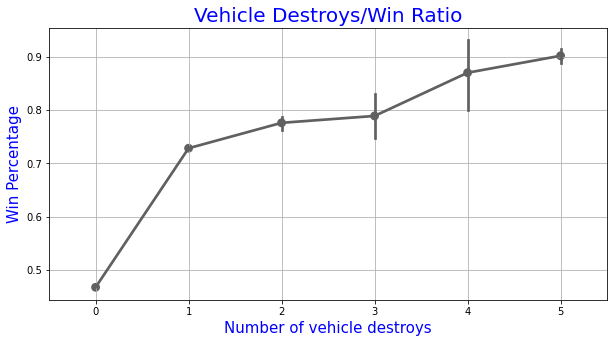

In [43]:
f,ax1=plt.subplots(figsize=(10,5))
sns.pointplot(x="vehicleDestroys",y="winPlacePerc",data=data,color="#606060",alpha=0.8)
plt.xlabel('Number of vehicle destroys',fontsize=15,color='blue')
plt.ylabel('Win Percentage',fontsize=15,color='blue')
plt.title("Vehicle Destroys/Win Ratio",fontsize=20,color='blue')
plt.grid()
plt.show()

####Grouping swimming distance in four categories and plot:

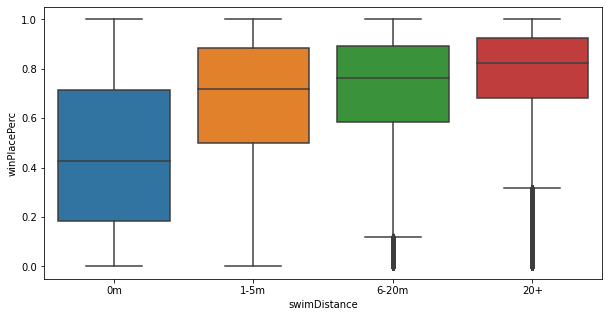

In [44]:
swim=df.copy()
swim['swimDistance']=pd.cut(swim['swimDistance'],[-1,0,5,20,5286],labels=['0m','1-5m','6-20m','20+'])
plt.figure(figsize=(10,5))
sns.boxplot(x='swimDistance',y='winPlacePerc',data=swim)
plt.show()

####The Healers

In [45]:
print("average person uses for {:.1f}m heal items, 99% people uses {}m or less, while the doctor used {}m. "
.format(df['heals'].mean(),df['heals'].quantile(0.99),df['heals'].max()))
print("average person uses for {:.1f}m boost items, 99% people uses {}m or less, while the doctor used {}m. "
.format(df['boosts'].mean(),df['boosts'].quantile(0.99),df['boosts'].max()))


average person uses for 1.4m heal items, 99% people uses 12.0m or less, while the doctor used 80m. 
average person uses for 1.1m boost items, 99% people uses 7.0m or less, while the doctor used 33m. 


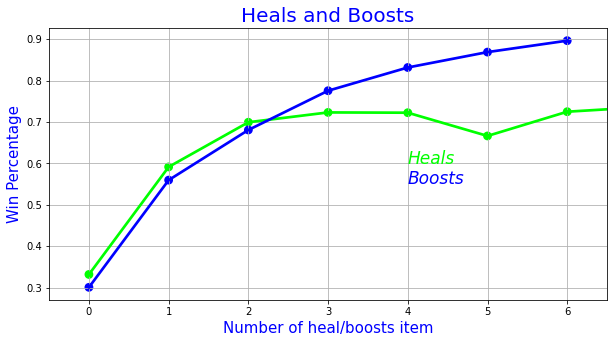

In [46]:
data=df.copy()
data=data[data['heals']<data['heals'].quantile(0.99)]
data=data[data['boosts']<data['boosts'].quantile(0.99)]
f,ax1=plt.subplots(figsize=(10,5))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize=17,style='italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize=17,style='italic')
plt.xlabel('Number of heal/boosts item',fontsize=15,color='blue')
plt.ylabel('Win Percentage',fontsize=15,color='blue')
plt.title('Heals and Boosts',fontsize=20,color='blue')
plt.grid()
plt.show()

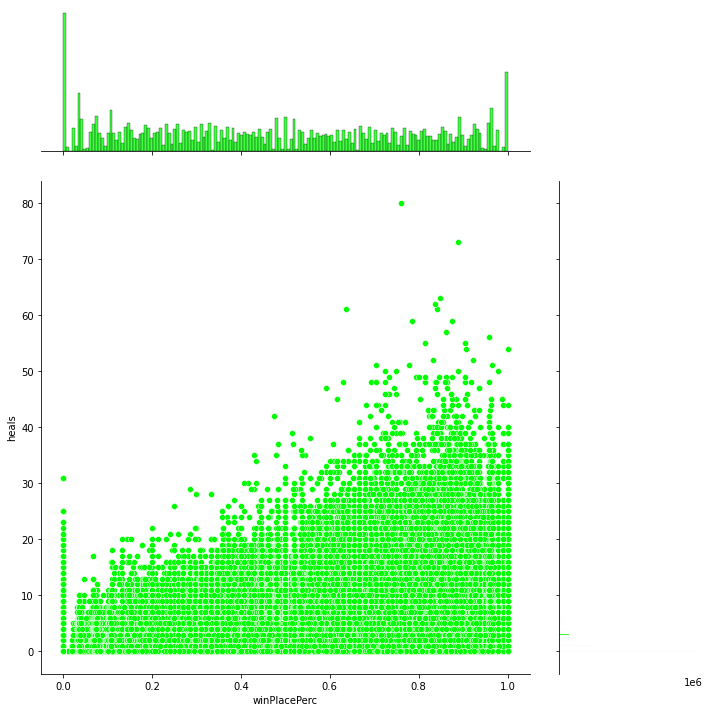

In [47]:
sns.jointplot(x='winPlacePerc',y='heals',data=df,height=10,ratio=3,color='lime')
plt.show()

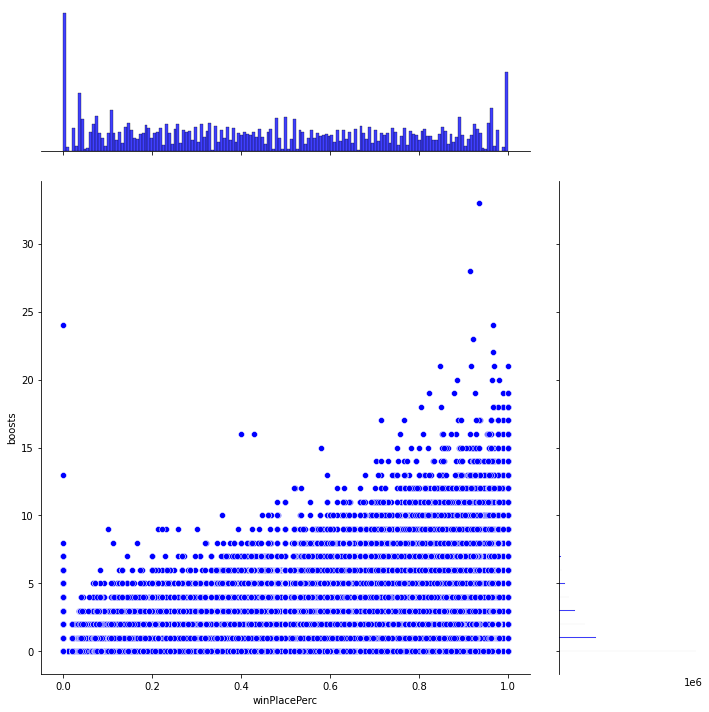

In [48]:
sns.jointplot(x='winPlacePerc',y='boosts',data=df,height=10,ratio=3,color='blue')
plt.show()

###So healing and boosting are coorelated with winPlacePerc. Boosting is more.
####In every plot there is an abnormal behaviour when values are 0. 

##**Solos,duos and squard**

####There are three mode are there in the game. One can play solo,duo or with three friend(squard) 

##**Person correlation with the variables.**

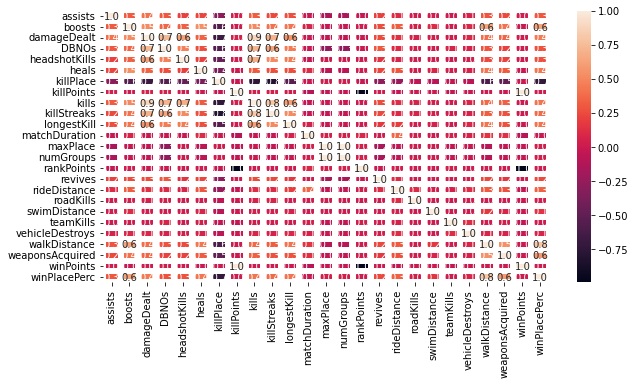

In [49]:
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax)
plt.show()

In [50]:
submission1=pd.read_csv("/content/drive/MyDrive/data/sample_submission_V2.csv")

In [51]:

submission1.to_csv('submission.csv',index=False)